In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel

In [11]:
print(os.listdir("C:\\Users\\Surya\\Desktop\\Machine Learning Project\\Pokedex"))

['train', 'val']


In [12]:
SIZE=128

# Storing Images and Labels as arrays
### Capture images and labels into arrays.
### Start by creating empty lists.

In [13]:
train_images = []
train_labels = [] 
for directory_path in glob.glob("C:\\Users\\Surya\\Desktop\\Machine Learning Project\\Pokedex\\train\\*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Optional step. Change BGR to RGB
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

Abra
C:\Users\Surya\Desktop\Machine Learning Project\Pokedex\train\Abra\0282b2f3a22745f1a436054ea15a0ae5.jpg
C:\Users\Surya\Desktop\Machine Learning Project\Pokedex\train\Abra\06b9eec4827d4d49b1b4c284308708df.jpg
C:\Users\Surya\Desktop\Machine Learning Project\Pokedex\train\Abra\10a9f06ec6524c66b779ea80354f8519.jpg
C:\Users\Surya\Desktop\Machine Learning Project\Pokedex\train\Abra\1788abb8b51f48509cfac8067bd99e14.jpg
C:\Users\Surya\Desktop\Machine Learning Project\Pokedex\train\Abra\28cfad92ad934d1f9b579cbff4b5d012.jpg
C:\Users\Surya\Desktop\Machine Learning Project\Pokedex\train\Abra\2eb2a528f9a247358452b3c740df69a0.jpg
C:\Users\Surya\Desktop\Machine Learning Project\Pokedex\train\Abra\32240b108a8140f8b31c495166fc453c.jpg
C:\Users\Surya\Desktop\Machine Learning Project\Pokedex\train\Abra\34532bb006714727ade4075f0a72b92d.jpg
C:\Users\Surya\Desktop\Machine Learning Project\Pokedex\train\Abra\3680c3f65a484c3ba05a7cb93e1d7ae3.jpg
C:\Users\Surya\Desktop\Machine Learning Project\Pokedex\tra

In [14]:
test_images = []
test_labels = [] 
for directory_path in glob.glob("C:\\Users\\Surya\\Desktop\\Machine Learning Project\\Pokedex\\val\\*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Optional
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Encode labels from text (folder names) to integers.
### We use label Encoding to encode labels to integers

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

# Split data into test and train datasets

In [16]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# Normalize pixel values to between 0 and 1

In [17]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# FEATURE EXTRACTOR function

In [18]:
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  
        #print(image)
        
        df = pd.DataFrame()  
        
        
        input_img = x_train[image, :,:,:]
        img = input_img
    
    #START ADDING DATA TO THE DATAFRAME
    #Add feature extractors, e.g. edge detection, smoothing, etc. 
            
         # FEATURE 1 - Pixel values
         
        #Add pixel values to the data frame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values   
        
        
        # FEATURE 2 - Bunch of Gabor filter responses
        
                #Generate Gabor features
        num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
        kernels = []
        for theta in range(2):   
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  
                lamda = np.pi/4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
         
        # FEATURE 3 Sobel
        edge_sobel = sobel(img)
        edge_sobel1 = edge_sobel.reshape(-1)
        df['Sobel'] = edge_sobel1
       
        
        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

# Extract features from training images

In [19]:
image_features = feature_extractor(x_train)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

# Reshape to a vector for SVM training

In [20]:
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_RF = np.reshape(image_features, (x_train.shape[0], -1)) #Reshape to #images, features

In [21]:
from sklearn import svm

In [22]:
SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification

In [23]:
SVM_model.fit(X_for_RF, y_train)

SVC(decision_function_shape='ovo')

# Predict on Test data
### Extract features from test data and reshape, just like training data

In [24]:
test_features = feature_extractor(x_test)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [25]:
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

In [26]:
test_prediction = SVM_model.predict(test_for_RF)

# Inverse le transform to get original label back. 

In [27]:
test_prediction = le.inverse_transform(test_prediction)

# Print overall accuracy

In [30]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

Accuracy =  0.3698630136986301


# Print confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

In [29]:
cm

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 2, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

<AxesSubplot:>

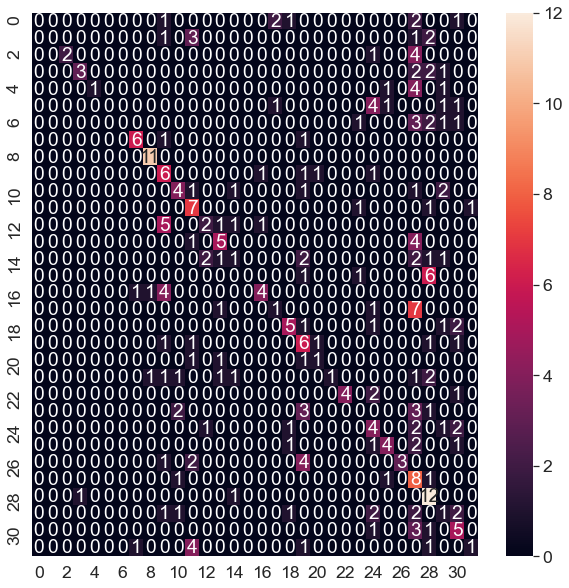

In [33]:
fig, ax = plt.subplots(figsize=(10,10))       
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)


# Check results on a few random images

In [39]:
import random

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
The prediction for this image is:  ['Tauros']
The actual label for this image is:  Tauros


C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


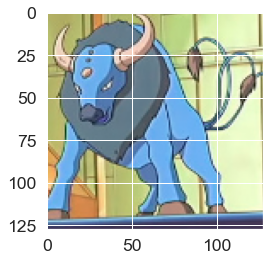

In [44]:
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = SVM_model.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

# Decision Tree Model

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  

In [47]:
classifier.fit(X_for_RF, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [48]:
y_pred= classifier.predict(test_for_RF)  

In [49]:
y_pred = le.inverse_transform(y_pred)

# Accuracy

In [51]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, y_pred))

Accuracy =  0.2363013698630137


# Confusion Matrix

In [52]:
cm = confusion_matrix(test_labels, y_pred)

# Predicting the random image

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
The prediction for this image is:  ['Electrode']
The actual label for this image is:  Electrode


C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


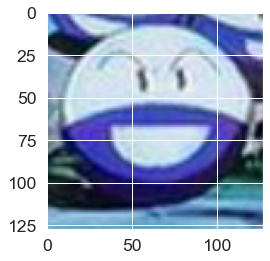

In [58]:
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = classifier.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

# KNN Algorithm

In [71]:
from sklearn.neighbors import KNeighborsClassifier  

In [103]:
kn= KNeighborsClassifier(n_neighbors=13, metric='minkowski', p=2 )
  

In [104]:
kn.fit(X_for_RF, y_train)

KNeighborsClassifier(n_neighbors=13)

In [105]:
kny= kn.predict(test_for_RF)  

In [106]:
kny = le.inverse_transform(kny)

In [107]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, kny))

Accuracy =  0.2534246575342466


Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
The prediction for this image is:  ['Fearow']
The actual label for this image is:  Fearow


C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


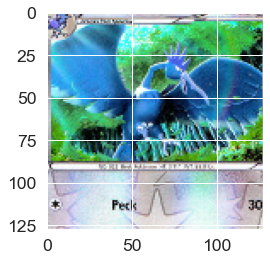

In [69]:
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = kn.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

# Random Forest 

In [70]:
from sklearn.ensemble import RandomForestClassifier 

In [108]:
rf= RandomForestClassifier(n_estimators= 50, random_state = 42)  
rf.fit(X_for_RF, y_train)  

RandomForestClassifier(n_estimators=50, random_state=42)

In [109]:
rf_y = rf.predict(test_for_RF)

In [110]:
rf_y = le.inverse_transform(rf_y)

In [111]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, rf_y))

Accuracy =  0.5308219178082192


In [112]:
cm = confusion_matrix(test_labels, rf_y)

<AxesSubplot:>

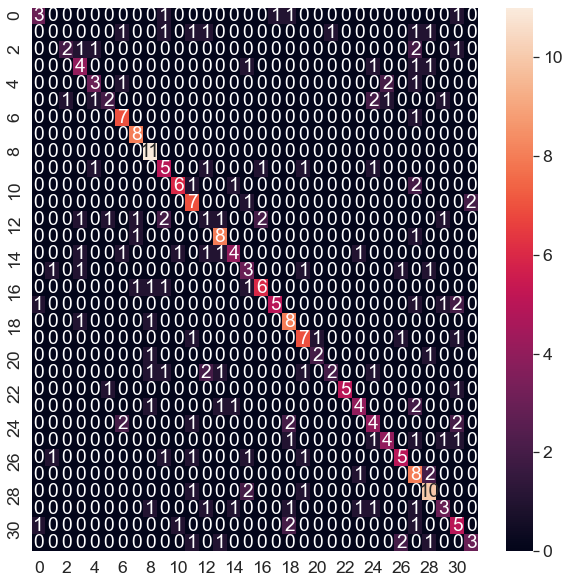

In [114]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
The prediction for this image is:  ['Electrode']
The actual label for this image is:  Electrode


C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


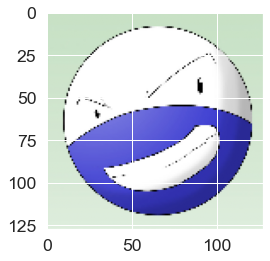

In [115]:
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = rf.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

# Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
nb = GaussianNB()  
nb.fit(X_for_RF, y_train) 

GaussianNB()

In [119]:
ynb=nb.predict(test_for_RF)

In [120]:
ynb = le.inverse_transform(ynb)

In [121]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, ynb))

Accuracy =  0.3904109589041096


In [124]:
cm = confusion_matrix(test_labels, ynb)

cm

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 1, 0],
       [0, 0, 0, ..., 0, 7, 0],
       [0, 2, 0, ..., 0, 0, 1]], dtype=int64)

<AxesSubplot:>

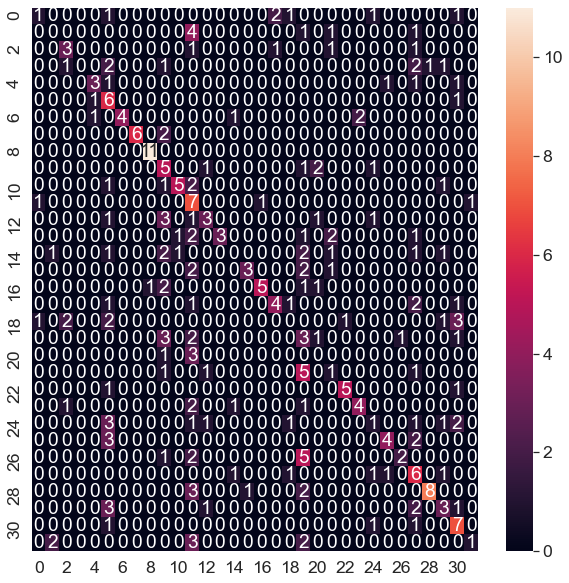

In [125]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
The prediction for this image is:  ['Venusaur']
The actual label for this image is:  Venusaur


C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


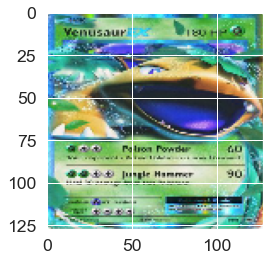

In [127]:
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = nb.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])